# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Birgita Putri Grania Effendi
- **Email:** birgitaeffendi@gmail.com
- **ID Dicoding:** grania

## Menentukan Pertanyaan Bisnis

- Apa hubungan temperatur (variabel temp) dengan jumlah pengguna yang terdaftar (variabel registered)?
- Apa pengaruh cuaca (variabel weathersit) terhadap jumlah sepeda yang disewa (variabel cnt) ?
- Berapa jumlah sepeda sewa yang digunakan pada hari libur (holiday = 1) dibandingkan dengan hari biasa (holiday = 0) selama musim panas (season = 2) pada tahun 2011 (yr = 0) dan 2012 (yr = 1)?


## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
#upload data csv
from google.colab import files
uploaded = files.upload()

df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

###Melihat Tipe Data

In [7]:
print('Dataframe hour:')
print(df_hour.info())

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


dteday seharusnya tipe data datetime, tetapi yang ditunjukkan tipe datanya object

In [8]:
print('Dataframe day:')
print(df_day.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


dteday seharusnya tipe data datetime, tetapi yang ditunjukkan tipe datanya object

###Mencari Missing Value

In [9]:
print('Dataframe hour:')
df_hour.isna().sum()

Dataframe hour:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print('Dataframe day:')
df_day.isna().sum()

Dataframe day:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value pada kedua file csv (semua data memiliki nilai)

###Data Duplikat

In [11]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


### Cleaning Data

**Memperbaiki Tipe Data**

In [12]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

**Cek Tipe Data yang Sudah Diperbaiki**

In [13]:
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtype)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore Statistik

In [14]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Untuk setiap kolom variabel:
*   count: jumlah total entri atau pengamatan pada kolom tersebut.
*   mean (rata-rata): nilai rata-rata atau nilai tengah dari data.
*   std (standar deviasi): ukuran sebaran atau dispersi data. Standar deviasi yang lebih tinggi menunjukkan bahwa data lebih tersebar.
*   min (nilai minimum): nilai terkecil dalam dataset.
*   max (nilai maksimum): nilai terbesar dalam dataset.
*   25%, 50%, 75% (kuartil): nilai-nilai yang membagi data menjadi empat bagian sama besar. Kuartil ke-2 (50%) adalah median atau nilai tengah.



In [15]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Untuk setiap kolom variabel,
*   instant: Nomor identifikasi unik untuk setiap entri dalam dataset.
*   season: Musim pada saat pengukuran.
*   yr: Tahun pengukuran. Nilai 0 dan 1 mewakili tahun 2011 dan 2012.
*   mnth: Bulan pengukuran, dengan nilai dari 1 hingga 12.
*   holiday: Indikator apakah hari itu merupakan hari libur atau tidak (0 untuk tidak, 1 untuk iya).
*   weekday: Hari dalam seminggu, dengan nilai dari 0 hingga 6 (0 untuk Minggu, 6 untuk Sabtu).
*   workingday: Indikator apakah itu hari kerja atau tidak (0 untuk tidak, 1 untuk iya).
*   weathersit: Kondisi cuaca pada saat pengukuran.
*   temp: Suhu dalam satuan normalisasi.
*   atemp: Suhu perasa (dengan satuan normalisasi).
*   hum: Kelembaban relatif.
*   windspeed: Kecepatan angin normalisasi.
*   casual: Jumlah penyewa sepeda yang tidak terdaftar (casual).
*   registered: Jumlah penyewa sepeda yang terdaftar (registered).
*   cnt: Jumlah total penyewa sepeda (casual + registered).

###Melihat Korelasi

In [16]:
df_hour.corr()

<ipython-input-16-3f825b9665f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hour.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [17]:
df_day.corr()


<ipython-input-17-d86ec6c860d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_day.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


**Insight**

Koefisien korelasi yang didapatkan dari data hour.csv dan day.csv menunjukkan seberapa kuat hubungan yang dimiliki antar variabel. Informasi yang didapatkan adalah keterhubungan antara variabel-variabel yang akan digunakan untuk menjawab 3 pertanyaan di atas. Diketahui bahwa cuaca dan temperatur memiliki hubungan dengan jumlah sepeda sewa yang digunakan. Selain itu, didapatkan pula bahwa pengguna casual juga memengaruhi jumlah sepeda sewa yang digunakan.

###Melihat Distribusi

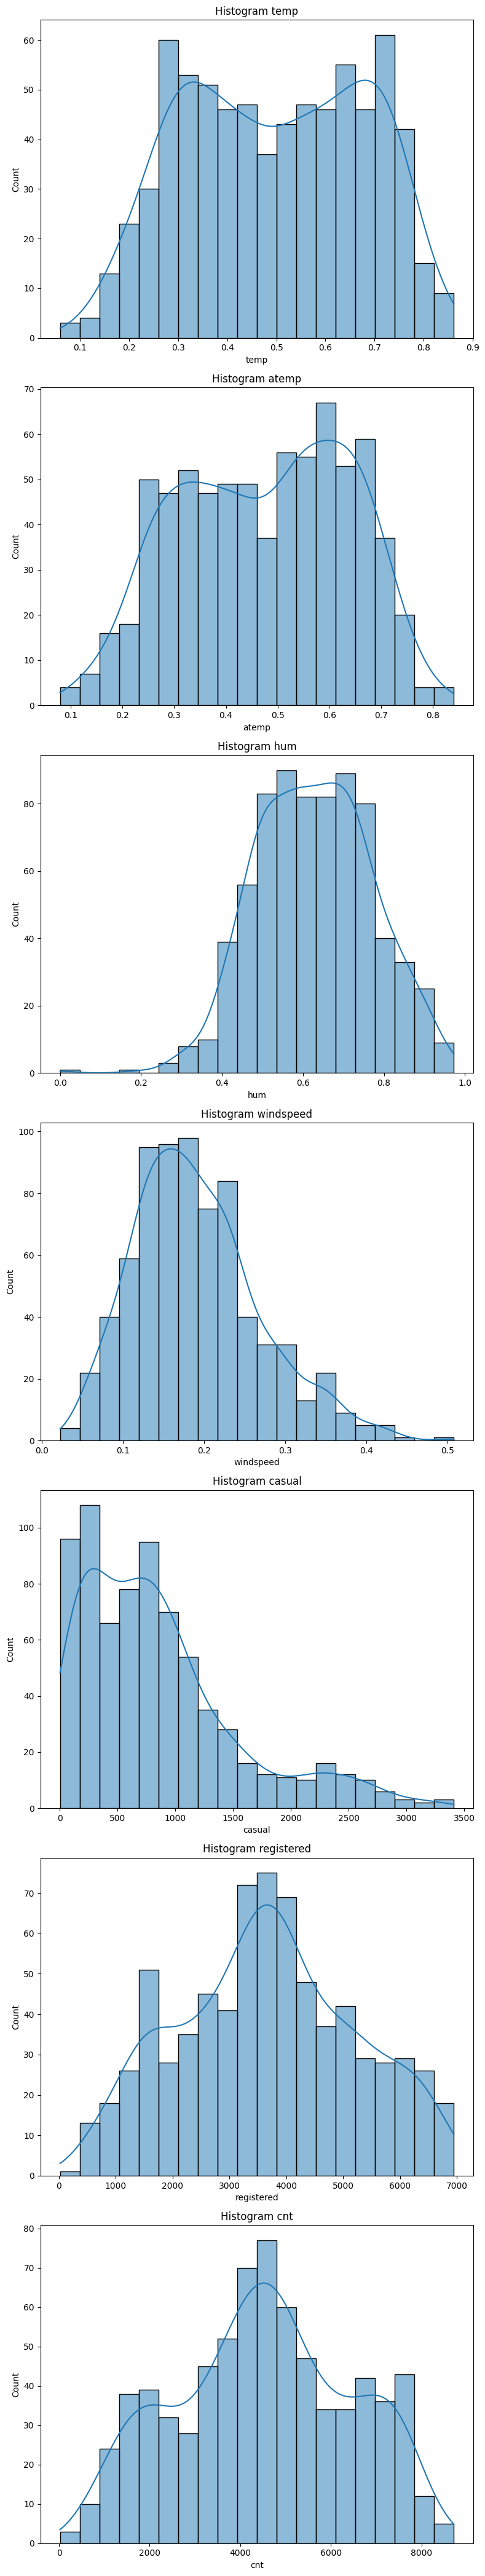

In [18]:
#distribusi data numerik
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 6 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    sns.histplot(df_day[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram {column}')

plt.tight_layout()
plt.show()

**Insight**

Distribusi variabel cnt dan registered adalah distribusi normal sehingga memudahkan proses analisis berikutnya. Distribusi variabel casual dan windspeed adalah distribusi *right-skewed* menunjukkan bahwa banyaknya pengguna harian casual yang rendah dan kecepatan angin yang rendah selama tahun 2011 dan 2012. Distribusi variabel humidity adalah distribusi *left-skewed* menunjukkan kecenderungan kelembaban yang tinggi. Kelembaban dapat memengaruhi cuaca secara positif jika dilihat dari tabel korelasi sebelumnya.

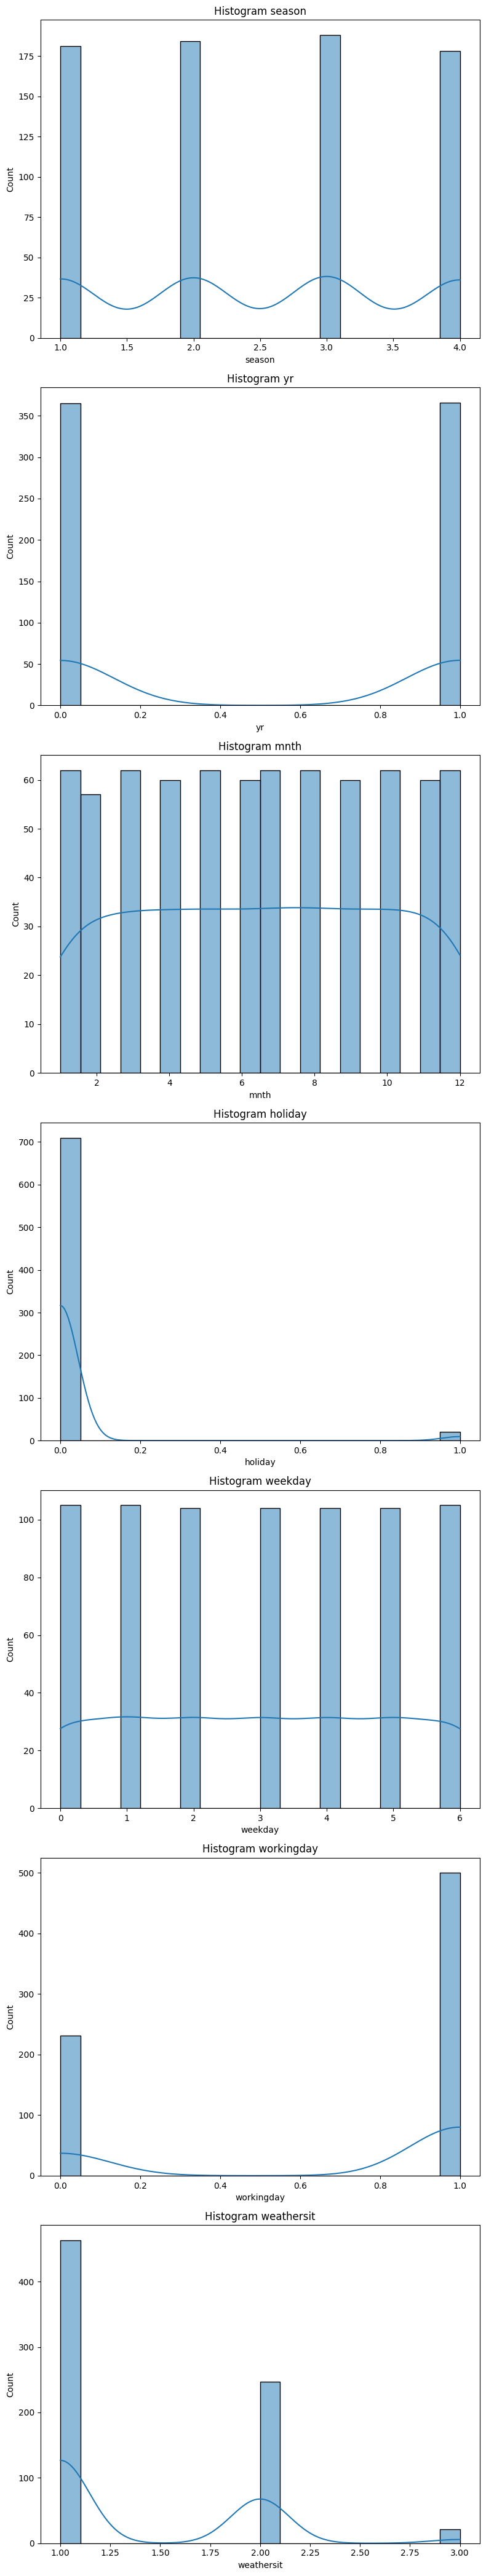

In [19]:
#distribusi data kategorial
categorial_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axes = plt.subplots(nrows=len(categorial_columns), ncols=1, figsize=(8, 6 * len(categorial_columns)))

for i, column in enumerate(categorial_columns):
    sns.histplot(df_day[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram {column}')

plt.tight_layout()
plt.show()

**Insight**

Berdasarkan distribusi kategorial, jumlah data diambil setara untuk setiap musim, tahun dan bulan. Diketahui pula bahwa data sepeda sewa pada tahun 2011 dan 2012 ini didominasi dengan hari biasa sehingga dapat dilakukan analisis lebih lanjut secara visual pada bagian selanjutnya untuk melihat hubungan antara jumlah sepeda sewa dengan hari kerja.

###Explore Pertanyaan berdasarkan Statistik Deskriptif


In [20]:
#melihat statistik deskriptif untuk cnt berdasarkan weathersit
df_day.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


**Insight**

Diketahui bahwa kondisi cuaca (weathersit) 1 memiliki jumlah observasi (count) yang paling banyak, diikuti oleh kondisi cuaca 2, dan kondisi cuaca 3. Rata-rata jumlah penyewa sepeda tertinggi terdapat pada kondisi cuaca 1, diikuti oleh kondisi cuaca 2, dan kondisi cuaca 3. Standar deviasi bernilai tinggi pada kondisi cuaca 1 dan 2 menunjukkan variasi yang cukup besar dalam jumlah penyewa sepeda. Hal ini dapat mendukung bagian analisis visualisasi data untuk melihat pengaruh kondisi cuaca terhadap jumlah penyewa sepeda.

In [21]:
#menghitung parameter korelasi untuk melihat keterhubungan data
print("Korelasi antara weathersit dan cnt:", df_day['weathersit'].corr(df_day['cnt']))

Korelasi antara weathersit dan cnt: -0.2973912388346637


**Insight**

Nilai korelasi yang negatif menunjukkan bahwa hubungan negatif antara kondisi cuaca dengan jumlah penyewa sepeda meskipun nilainya tidak terlalu besar. Kondisi cuaca yang lebih buruk (weathersit tinggi) memiliki kemungkinan jumlah penyewa sepeda lebih rendah. Hal ini bisa saja terjadi karena cuaca yang buruk mengakibatkan orang malas bepergian menggunakan sepeda jika dilihat dari jumlah penyewanya. Begitu pula sebaliknya, kondisi cuaca yang bagus (weathersit rendah) mengakibatkan peningkatan jumlah penyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan temperatur (variabel temp) dengan jumlah pengguna yang terdaftar (variabel registered)?

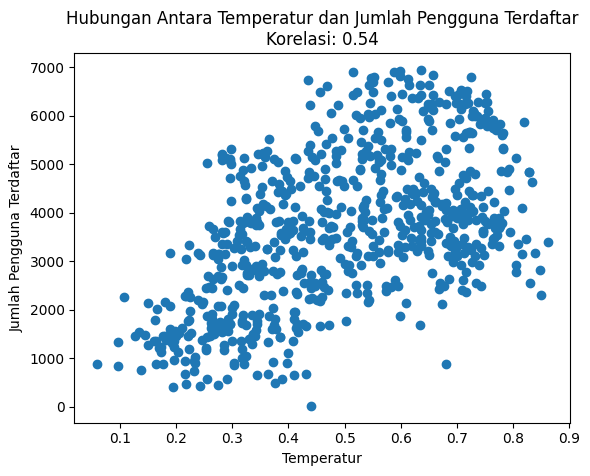

In [22]:
correlation_temp_registered = df_day['temp'].corr(df_day['registered'])

plt.scatter(df_day['temp'], df_day['registered'])
plt.title(f'Hubungan Antara Temperatur dan Jumlah Pengguna Terdaftar\nKorelasi: {correlation_temp_registered:.2f}')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()

**Insight**

Hasil plot jumlah pengguna terdaftar terhadap temperatur dan koefisien korelasinya menunjukkan  hubungan yang berbanding lurus di antara kedua variabel tersebut, yaitu jumlah pengguna sepeda terdaftar meningkat ketika temperatur meningkat.

### Pertanyaan 2: Apa pengaruh cuaca (variabel weathersit) terhadap jumlah sepeda yang disewa (variabel cnt)?


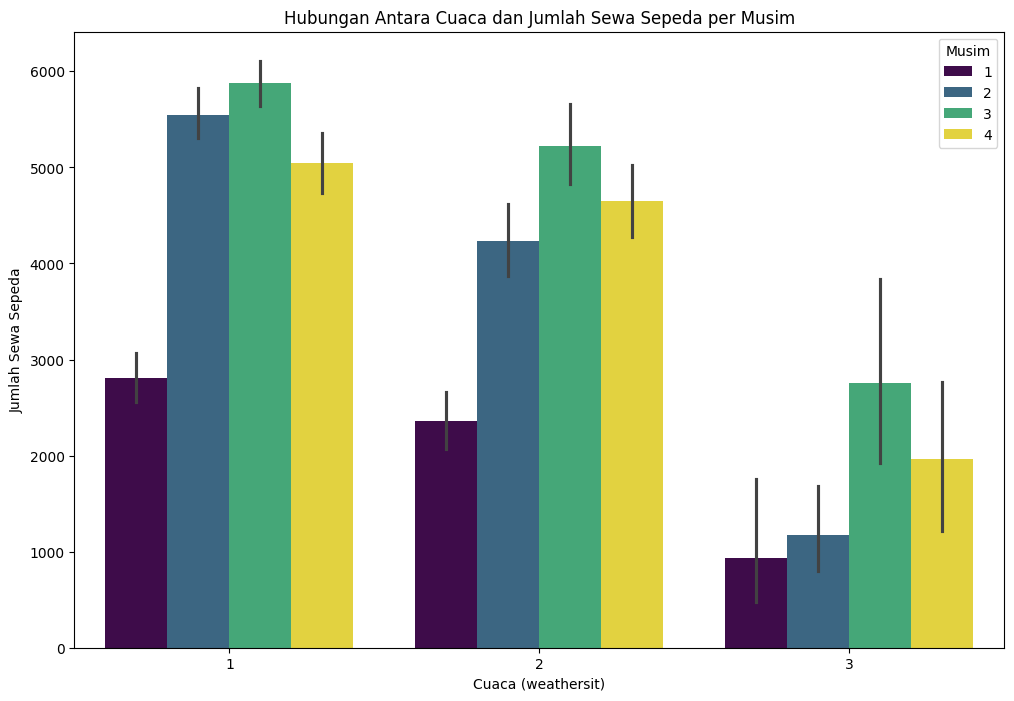

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x='weathersit', y='cnt', hue='season', data=df_day, palette='viridis')
plt.title('Hubungan Antara Cuaca dan Jumlah Sewa Sepeda per Musim')
plt.xlabel('Cuaca (weathersit)')
plt.ylabel('Jumlah Sewa Sepeda')
plt.legend(title='Musim')
plt.show()

**Weathersit**

* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Season**
* 1:spring
* 2:summer
* 3:fall
* 4: winter






**Insight**

Hasil diagram batang yang menampilkan jumlah sewa sepeda untuk weathersit per setiap musimnya menunjukkan bahwa jumlah sewa sepeda meningkat ketika cuacanya bagus. Dalam hal ini, weathersit 1 (cerah berawan) memiliki jumlah sewa sepeda terbanyak dibandingkan weathersit lainnya. Indikator yang diberikan pada weathersit 1 menunjukkan bahwa masyarakat di sekitar menganggapnya sebagai cuaca yang  nyaman untuk bersepeda sehingga jumlah sewa sepeda meningkat. Lalu, jumlah sewa sepeda berdasarkan musim menunjukkan bahwa jumlah sewa sepeda terbanyak berada pada musim gugur, diikuti dengan musim semi, kemudian musim panas. Hal ini menunjukkan bahwa kondisi cuaca dan musim dapat menjadi pertimbangan penting bagi penyedia layanan sewa sepeda karena hal cuaca dapat memengaruhi tingkat permintaan sepeda. Selain itu, adanya musim gugur yang menonjol dibandingkan musim lainnya dapat mengindikasikan pola perilaku masyarakat terkait kenyamanan cuaca, perubahan aktivitas sehari-hari, maupun acara atau kegiatan yang terkait dengan musim gugur.







###Pertanyaan 3: Berapa jumlah sepeda sewa yang digunakan (cnt) pada hari libur (holiday = 1) selama musim panas (season = 2) pada tahun 2011 (yr = 1) dan 2012 (yr = 2) dibandingkan dengan hari biasa (holiday = 0)?

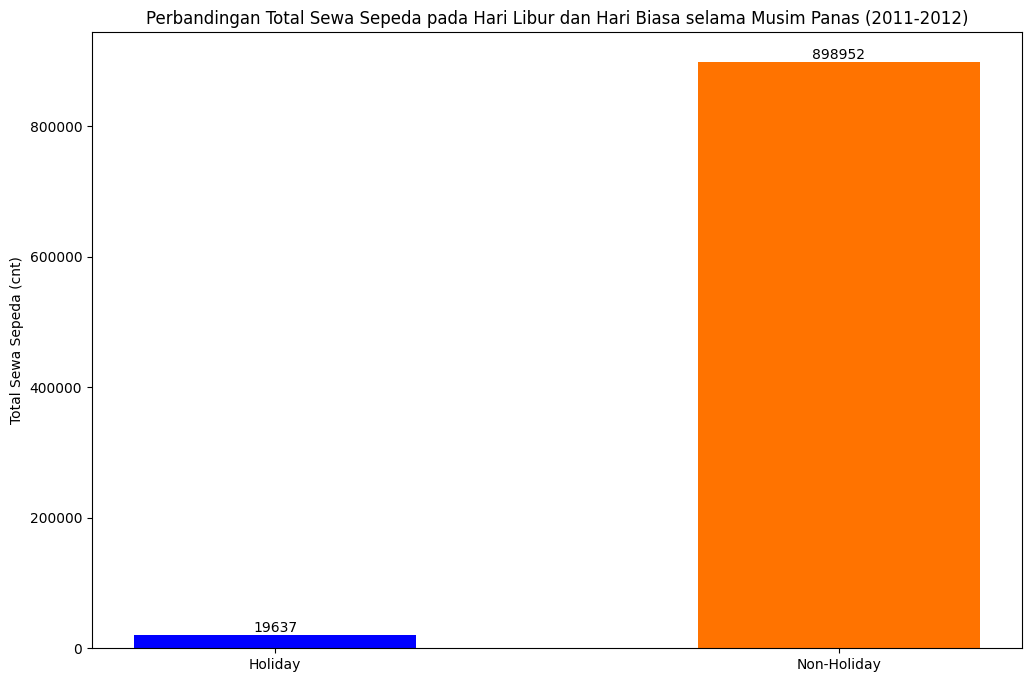

Total sepeda sewaan (cnt) pada hari libur selama musim panas pada tahun 2011 dan 2012 adalah:  19637
Total sepeda sewaan (cnt) pada hari biasa selama musim panas pada tahun 2011 dan 2012 adalah:  898952


In [25]:
# Filter data
holiday = df_day[(df_day['holiday'] == 1) & (df_day['season'] == 2) & ((df_day['yr'] == 0) | (df_day['yr'] == 1))]
total_holiday = holiday['cnt'].sum()

non_holiday = df_day[(df_day['holiday'] == 0) & (df_day['season'] == 2) & ((df_day['yr'] == 0) | (df_day['yr'] == 1))]
total_non_holiday = non_holiday['cnt'].sum()


# Plot
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.5

bar1 = ax.bar(0, total_holiday, bar_width, label='Holiday', color='blue')
bar2 = ax.bar(1, total_non_holiday, bar_width, label='Non-Holiday', color='orange')

ax.bar(1, total_non_holiday, bar_width, color='red', alpha=0.3)
ax.text(0, total_holiday + 100, str(total_holiday), ha='center', va='bottom')
ax.text(1, total_non_holiday + 100, str(total_non_holiday), ha='center', va='bottom')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Holiday', 'Non-Holiday'])
ax.set_ylabel('Total Sewa Sepeda (cnt)')
ax.set_title('Perbandingan Total Sewa Sepeda pada Hari Libur dan Hari Biasa selama Musim Panas (2011-2012)')


plt.show()


print("Total sepeda sewaan (cnt) pada hari libur selama musim panas pada tahun 2011 dan 2012 adalah: ", total_holiday)
print("Total sepeda sewaan (cnt) pada hari biasa selama musim panas pada tahun 2011 dan 2012 adalah: ", total_non_holiday)

**Insight**

Jumlah sepeda sewaan yang digunakan pada musim panas dibandingkan ketika hari biasa dan hari libur menunjukkan bahwa jumlah sepeda sewaan lebih banyak permintaannya ketika hari biasa. Pada hari biasa, masyarakat berdomisili di tempat data ini diambil memiliki kecenderungan perilaku untuk melakukan rutinitas sehari-hari seperti bekerja atau sekolah yang menggunakan sepeda sewaan. Pada hari biasa, masyarakat setempat memiliki kecenderungan perilaku untuk melakukan kegiatan liburan dibandingkan melakukan kegiatan yang mungkin menggunakan sepeda sewaan.


## Conclusion

- Jumlah pengguna sepeda terdaftar meningkat ketika temperatur meningkat menunjukkan bahwa temperatur dapat memengaruhi keinginan untuk bersepeda.
- Jumlah sepeda yang digunakan meningkat ketika cuaca bagus (musim gugur dan musim semi) menunjukkan bahwa cuaca dan musim cukup berpengaruh terhadap keinginan dan kebutuhan masyarakat untuk bersepeda.
- Perbandingan antara hari biasa dan hari libur pada musim panas menunjukkan bahwa kebutuhan penggunaan sepeda sewaan lebih banyak saat hari biasa karena kecenderungan kegiatan yang dilakukan oleh masyarakat.